<a href="https://colab.research.google.com/github/Katoshy/Data-Analysis-Projects/blob/main/AD_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Підготовка**
Підключення бібліотек та завантаження даних

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/possum.csv")
data

,Unnamed: 0,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


Переглянемо інформацію про наш ДатаФрейм

In [ ]:
data.info()
print(data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  101 non-null    int64  
 1   case        101 non-null    int64  
 2   site        101 non-null    int64  
 3   Pop         101 non-null    object 
 4   sex         101 non-null    object 
 5   age         101 non-null    float64
 6   hdlngth     101 non-null    float64
 7   skullw      101 non-null    float64
 8   totlngth    101 non-null    float64
 9   taill       101 non-null    float64
 10  footlgth    101 non-null    float64
 11  earconch    101 non-null    float64
 12  eye         101 non-null    float64
 13  chest       101 non-null    float64
 14  belly       101 non-null    float64
dtypes: float64(10), int64(3), object(2)
memory usage: 12.0+ KB
            count       mean        std   min   25%   50%   75%    max
Unnamed: 0  101.0  51.762376  30.573894   0.0  25.0  53.0  78.0

Подивемось чи є пусті значення 

In [ ]:
contain_null = data[data.age.isna() | data.footlgth.isna()]
print(contain_null.head())
print(contain_null.shape[0])

Empty DataFrame
Columns: [Unnamed: 0, case, site, Pop, sex, age, hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest, belly]
Index: []
0


In [ ]:
data['male'] = [1 if possum =='m' else 0 for possum in data['sex']]
data

,Unnamed: 0,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,male
0,0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1
1,1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,1
97,100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,1
98,101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,0
99,102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,1


Порахуємо кількість чоловіків та жінок

In [ ]:
print(data[(data['sex'] == 'f')].sex.count())
print(data[(data['sex'] == 'm')].sex.count())

42
59


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data_y = data.pop('male')
data_x = data.drop(['sex','Pop'], axis=1)

In [ ]:
print(data_y)
data_x

0      1
1      0
2      0
3      0
4      0
      ..
96     1
97     1
98     0
99     1
100    0
Name: male, Length: 101, dtype: int64


,Unnamed: 0,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,2,3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,3,4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,4,5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,99,100,7,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,100,101,7,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,101,102,7,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,102,103,7,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


Підганяємо дані і створюємо набори тренувальних і тестових даних

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.13, random_state=0, stratify=data_y)

In [ ]:
sex_lr = Pipeline([('scale', StandardScaler()), ('logreg', LogisticRegression(class_weight='balanced', random_state=0))])
sex_lr.fit(X_train, y_train)
preds = sex_lr.predict(X_test)

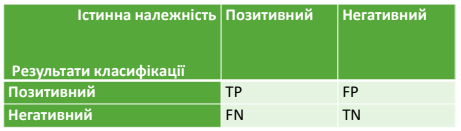

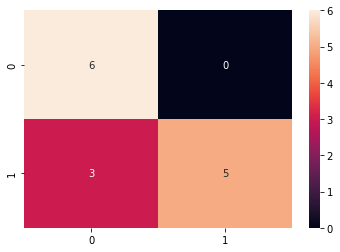

In [ ]:
mat = confusion_matrix(y_test,preds)
sns.heatmap(mat,annot=True)

In [ ]:
print(sex_lr.score(X_test,y_test))#відсоток правильно класифікованих значень

from sklearn.metrics import zero_one_loss
print(zero_one_loss(y_test, preds))# частка неправильно класифікованих об’єктів

0.7857142857142857
0.2142857142857143


In [ ]:
print(preds)
print(y_test)

[0 1 0 1 1 0 0 0 0 1 0 0 0 1]
4     0
65    1
98    0
91    1
64    1
11    0
36    0
39    0
69    1
27    1
1     0
89    1
48    1
25    1
Name: male, dtype: int64


Scikit-learn має функцію classification_report(), яка обчислює
влучність і повноту. На додаток до обчислення цих показників для
мітки класу, вона також обчислює незважене середнє між класами
і середньозважене (середнє між класами, зважене за кількістю
об’єктів у кожному класі). Стовпець support вказує кількість
об’єктів, які належать до кожного класу, використовуючи позначені
дані.

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.62      0.77         8

    accuracy                           0.79        14
   macro avg       0.83      0.81      0.78        14
weighted avg       0.86      0.79      0.78        14



Існують моделі машинного навчання, що допомагають визначити, які ж ознаки є
важливими. 

Дерева рішень рекурсивно розбивають дані, приймаючи рішення про
те, які ознаки використовувати для кожного поділу. Вони використовують
«жадібний» підхід, тобто вони щоразу шукають найбільший розкол, який можуть
зробити; він не обов’язково є оптимальним. Можна використовувати дерево
рішень, щоб оцінити важливість ознак, які визначають, як дерево розбиває дані
на вузлах прийняття рішень.

In [ ]:
pipeline = Pipeline([('scale', StandardScaler()), ('dt', 
                                                   DecisionTreeClassifier(random_state=0, class_weight='balanced'))])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=0))])

In [ ]:
predicted = pipeline.predict(X_test)

In [ ]:
print(pipeline.score(X_test, y_test))
print(classification_report(y_test, predicted))


0.5714285714285714
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.67      0.50      0.57         8

    accuracy                           0.57        14
   macro avg       0.58      0.58      0.57        14
weighted avg       0.60      0.57      0.57        14



Однією з поширених стратегій вибору ознак є відкидання ознак з низькою дисперсією. Ці ознаки не надто інформативні, оскільки вони в основному мають однакове значення в усьому наборі даних. Scikit-learn має клас VarianceThreshold для здійснення вибору ознак відповідно до мінімального порога дисперсії.
За замовчуванням він відкидає будь-які ознаки, які мають нульову дисперсію;
однак можна задати власний поріг.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
pipeline = Pipeline([('feature_selection',VarianceThreshold()),('scale',
StandardScaler()),('lr', LogisticRegression(class_weight='balanced',random_state=0))])
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.62      0.77         8

    accuracy                           0.79        14
   macro avg       0.83      0.81      0.78        14
weighted avg       0.86      0.79      0.78        14



Для задачі класифікації також можна використовувати метод k-найближчих
сусідів (k-NN), яка буде класифікувати спостереження відповідно до класу kнайближчих спостережень у n-вимірному просторі даних.
Порівняємо цей результат з навчанням машини опорних векторів (SVM), яка
проектує дані у вищий вимір, щоб знайти гіперплощину, яка розділяє класи.
Гіперплощина є n-вимірним еквівалентом площини, так само, як площина є двовимірним еквівалентом прямої. SVM, як правило, стійкі до викидів і можуть моделювати нелінійні межі рішень; однак SVM зазвичай працює повільніше.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test, knn_pred))


              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.57      0.50      0.53         8

    accuracy                           0.50        14
   macro avg       0.50      0.50      0.50        14
weighted avg       0.51      0.50      0.50        14



In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto', class_weight='balanced').fit(X_train, y_train)
svm_pred = svc.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.54      0.88      0.67         8

    accuracy                           0.50        14
   macro avg       0.27      0.44      0.33        14
weighted avg       0.31      0.50      0.38        14



In [ ]:
print(svm_pred)

[1 1 1 1 1 1 1 1 1 0 1 1 1 1]
